In [86]:
pip install pandas numpy matplotlib seaborn jupyterlab


Note: you may need to restart the kernel to use updated packages.


# Introduction

#### This project performs Exploratory Data Analysis (EDA) on the Netflix Titles dataset.We aim to explore the types of content Netflix offers, where it's from and how it has evolved over time. This helps us understand Netflix’s content strategy.


# Phase#1 - Data Exploration

## 1.1-Importing Library+Dataset

In [ ]:
# Importing necessary libraries 
import pandas as pd
# Importing the dataset
df=pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [88]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


## 1.2-Initial Exploration

In [89]:
df.info() # data types, non-null counts, memory usage


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [90]:
print(df.shape) #(rows, columns)
print(df.columns) # column names


(8807, 12)
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [91]:
print(df.describe(include='all')) # summary statistics for numerical and categorical column

       show_id   type                 title       director  \
count     8807   8807                  8807           6173   
unique    8807      2                  8807           4528   
top         s1  Movie  Dick Johnson Is Dead  Rajiv Chilaka   
freq         1   6131                     1             19   
mean       NaN    NaN                   NaN            NaN   
std        NaN    NaN                   NaN            NaN   
min        NaN    NaN                   NaN            NaN   
25%        NaN    NaN                   NaN            NaN   
50%        NaN    NaN                   NaN            NaN   
75%        NaN    NaN                   NaN            NaN   
max        NaN    NaN                   NaN            NaN   

                      cast        country       date_added  release_year  \
count                 7982           7976             8797   8807.000000   
unique                7692            748             1767           NaN   
top     David Attenborough 

In [92]:
print(df.isnull().sum()) # count of null values in each column

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [93]:
df['type'].value_counts() 
#df['rating'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

# PHASE 2 – Data Cleaning & Column Handling (Netflix Dataset)

## 2.1-Drop Unnecessay Columns

In [94]:
print(df.columns.tolist())

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [95]:
df.drop(['show_id','title','director','description'],axis=1,inplace=True)
df.head()

,type,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


## 2.2-Handle missing values

In [ ]:
df.isnull().sum()

type              0
cast            825
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
dtype: int64

In [97]:
df['rating'].fillna('Unknown',inplace=True)
df['country'].fillna('Unknown',inplace=True)
df['duration'].fillna('Unknown',inplace=True)


In [98]:
df.dropna(subset=['date_added'], inplace=True) # drop rows where 'date_added' is null

In [99]:
df.isnull().sum()

type              0
cast            825
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
dtype: int64

## 2.3-Convert date_added to datetime

In [100]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [101]:
print(df['date_added'].head())
print(df['date_added'].dtype)

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]
datetime64[ns]


## 2.4-Feature Engineering

In [ ]:

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day
df['weekday_added'] = df['date_added'].dt.day_name()
df[['date_added', 'year_added', 'month_added', 'day_added', 'weekday_added']].head()



,date_added,year_added,month_added,day_added,weekday_added
0,2021-09-25,2021,9,25,Saturday
1,2021-09-24,2021,9,24,Friday
2,2021-09-24,2021,9,24,Friday
3,2021-09-24,2021,9,24,Friday
4,2021-09-24,2021,9,24,Friday


# Phase#3-EDA

## Step 1: Content Breakdown – "What does Netflix have?"

### 1.How many Movies vs TV Shows?

Movie      6131
TV Show    2666
Name: type, dtype: int64


<Axes: title={'center': 'Movies vs TV Shows'}>

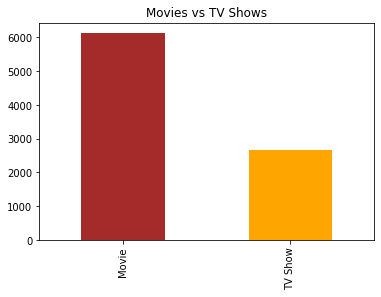

In [108]:
print(df['type'].value_counts())
df['type'].value_counts().plot(kind='bar',title='Movies vs TV Shows',color=['brown','orange'])

### 2.Top 10 Counrtries producing Content

United States                             2812
India                                      972
Unknown                                    830
United Kingdom                             418
Japan                                      244
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64


<Axes: title={'center': 'Top 10 Countries Producing Content'}>

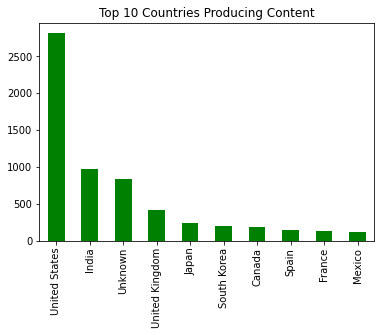

In [112]:
print(df['country'].value_counts())
df['country'].value_counts().head(10).plot(kind='bar',title="Top 10 Countries Producing Content",color='green')


### 3. Rating Distribution

<Axes: title={'center': 'Rating Distribution'}>

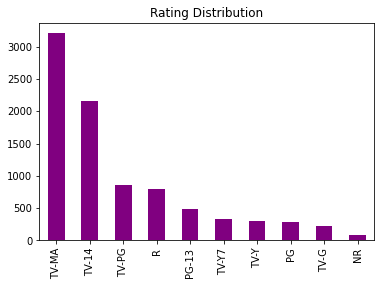

In [114]:
df['rating'].value_counts().head(10).plot(kind='bar',title='Rating Distribution',color='purple')

### 4.Most Active Release Years

<Axes: title={'center': 'Most Active Release Years'}>

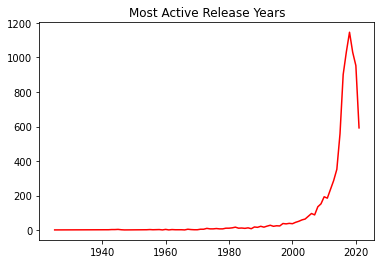

In [117]:
df['release_year'].value_counts().sort_index(ascending=True).plot(kind='line',title='Most Active Release Years',color='red')

## Step 2: Time Trends – “When is Netflix most active?”

### 1.In which year did Netflix add the most content?

<Axes: title={'center': 'Content Added by Year'}>

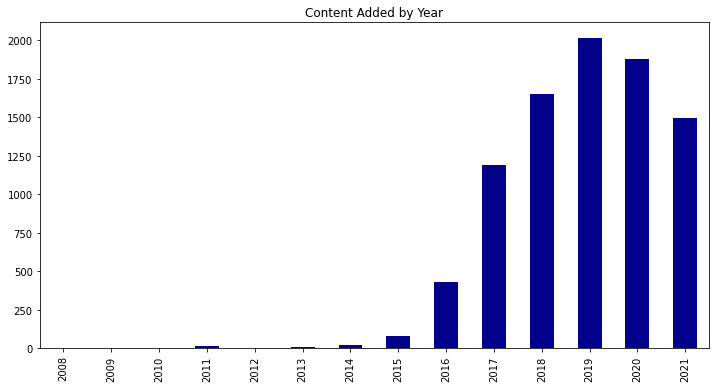

In [121]:
df['year_added'].value_counts().sort_index().plot(kind='bar',title='Content Added by Year',color='darkblue',figsize=(12,6))

### 2.What is the most active month for adding content?

<Axes: title={'center': 'Content Added by Month'}>

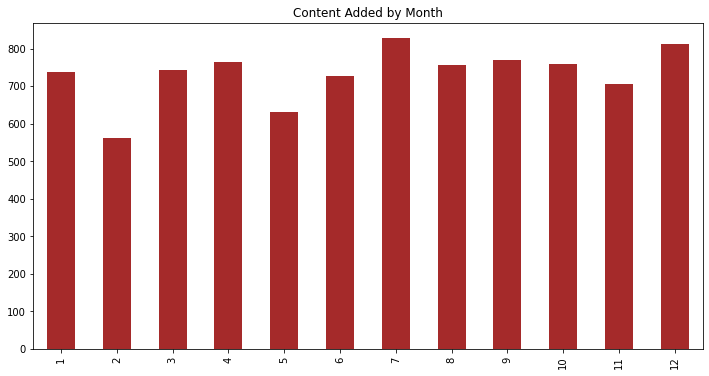

In [123]:
df['month_added'].value_counts().sort_index().plot(kind='bar',title='Content Added by Month',color='brown',figsize=(12,6))

### 3.Which weekday sees the most new additions?

<Axes: title={'center': 'Content Added by Weekday'}>

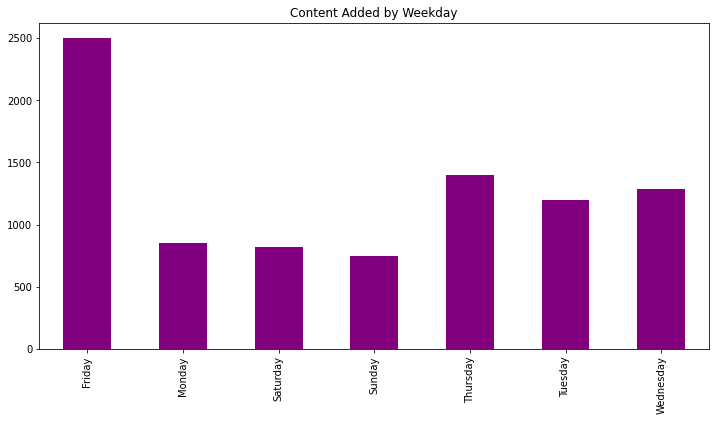

In [126]:
df['weekday_added'].value_counts().sort_index().plot(kind='bar',title='Content Added by Weekday',color='purple',figsize=(12,6))

### 4.Movies vs TV Shows over the years

<Axes: title={'center': 'Movies vs TV Shows Added per Year'}, xlabel='year_added'>

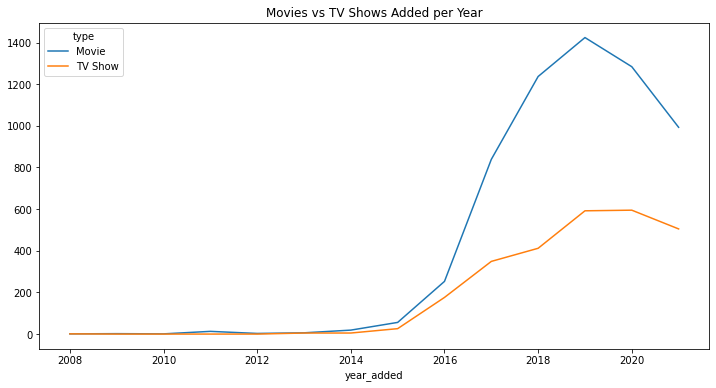

In [127]:
df.groupby('type')['year_added'].value_counts().unstack().fillna(0).T.plot(title='Movies vs TV Shows Added per Year', figsize=(12,6))


# Conclusion

###
Key Insights:
- Netflix has more Movies than TV Shows.
- US, India, and UK are the top content producers.
- The most common content ratings are TV-MA and TV-14.
- Content peaked in the years 2018–2020.
- Friday is the most common day for Netflix to add new content.
